# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.shape    #29322 rows, 3 columns
df_pct_poverty.shape  #29329 rows, 3 columns
df_pct_completed_hs.shape  #29329 rows, 3 columns
df_share_race_city.shape  #29268 rows, 7 columns
df_fatalities.shape       #2535 rows, 14 columns

(2535, 14)

In [6]:
df_hh_income.columns
df_pct_poverty.columns
df_pct_completed_hs.columns
df_share_race_city.columns
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [7]:
df_hh_income.duplicated().sum()
df_pct_poverty.duplicated().sum()
df_pct_completed_hs.duplicated().sum()
df_share_race_city.duplicated().sum()
df_fatalities.duplicated().sum()      #no duplicates

np.int64(0)

In [8]:
df_hh_income.isna().sum()
df_pct_poverty.isna().sum()
df_pct_completed_hs.isna().sum()      #many NaNs
df_share_race_city.isna().sum()
df_fatalities.isna().sum()

,0
id,0
name,0
date,0
manner_of_death,0
armed,9
age,77
gender,0
race,195
city,0
state,0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [9]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty.head()
df_pct_poverty.sort_values(by='poverty_rate', ascending=False)

,Geographic Area,City,poverty_rate
4472,FL,Homestead Base CDP,98.6
23716,SD,Allen CDP,94.1
20428,OK,Badger Lee CDP,93.8
27738,WA,Outlook CDP,93.8
26509,UT,Randlett CDP,93.5
...,...,...,...
24980,TX,El Mesquite CDP,-
2864,CA,Myers Flat CDP,-
10747,LA,Sugartown CDP,-
16400,NJ,Zarephath CDP,-


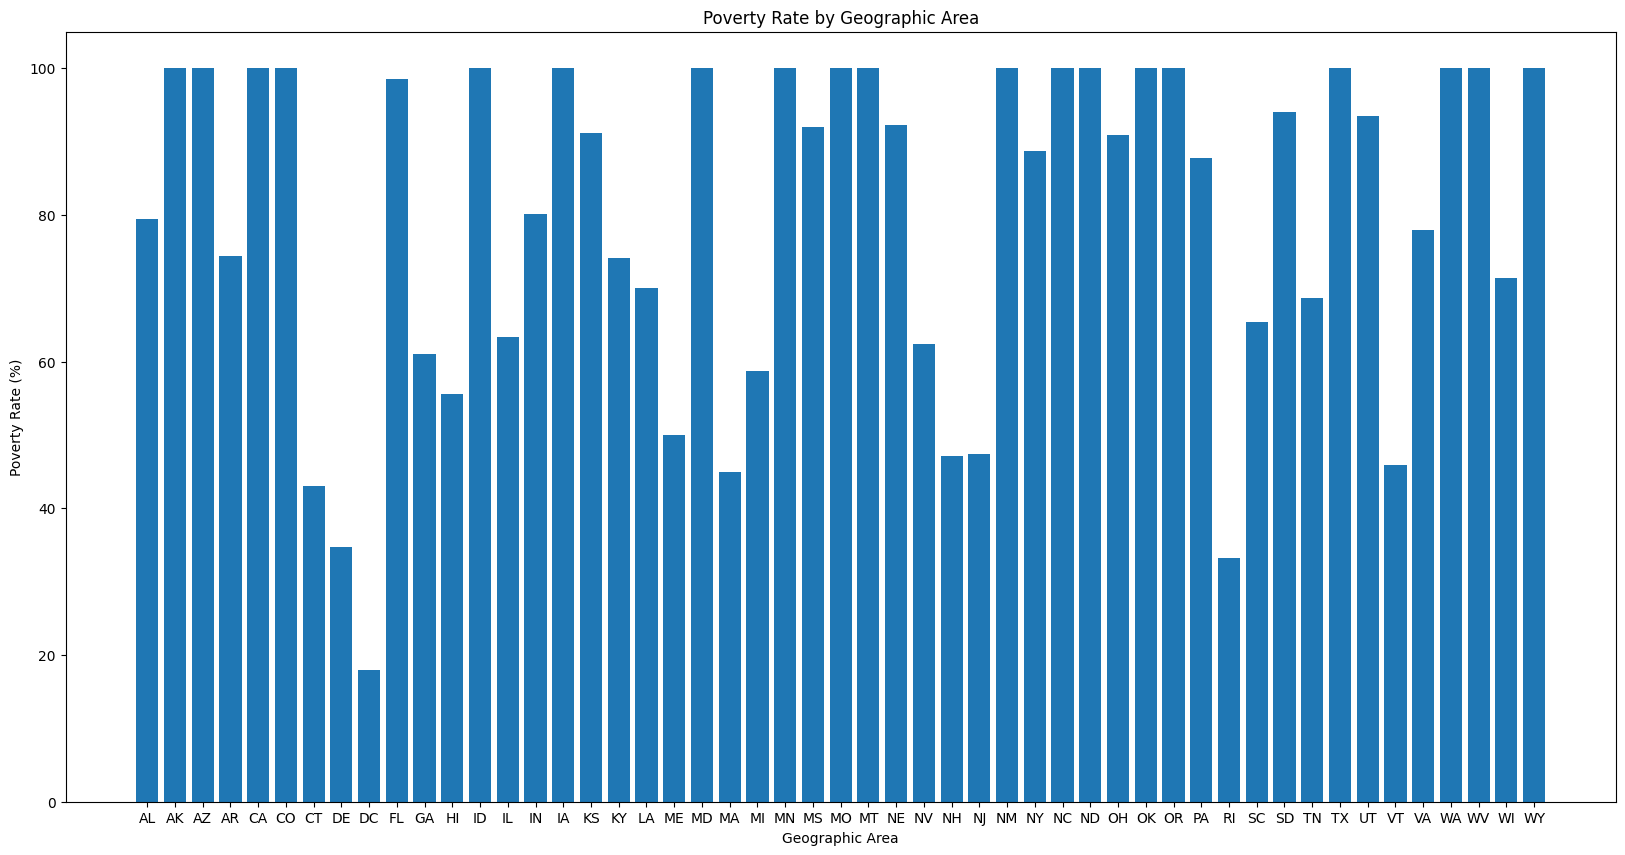

In [11]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
plt.figure(figsize=(20,10))
plt.xlabel("Geographic Area")
plt.ylabel("Poverty Rate (%)")
plt.title("Poverty Rate by Geographic Area")

plt.bar(df_pct_poverty['Geographic Area'], df_pct_poverty['poverty_rate'])
plt.ylim(0, df_pct_poverty['poverty_rate'].max() + 5)
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
df_pct_completed_hs.head()
df_pct_completed_hs.sort_values(by='percent_completed_hs', ascending=True)

,Geographic Area,City,percent_completed_hs
14024,MO,Goss town,-
770,AK,Loring CDP,-
14570,MO,Tarrants village,-
1113,AZ,Hunter Creek CDP,-
16280,NJ,Ross Corner CDP,-
...,...,...,...
7176,IL,Scott AFB CDP,99.8
26212,TX,West Lake Hills city,99.8
23070,PA,Toftrees CDP,99.8
25983,TX,Serenada CDP,99.9


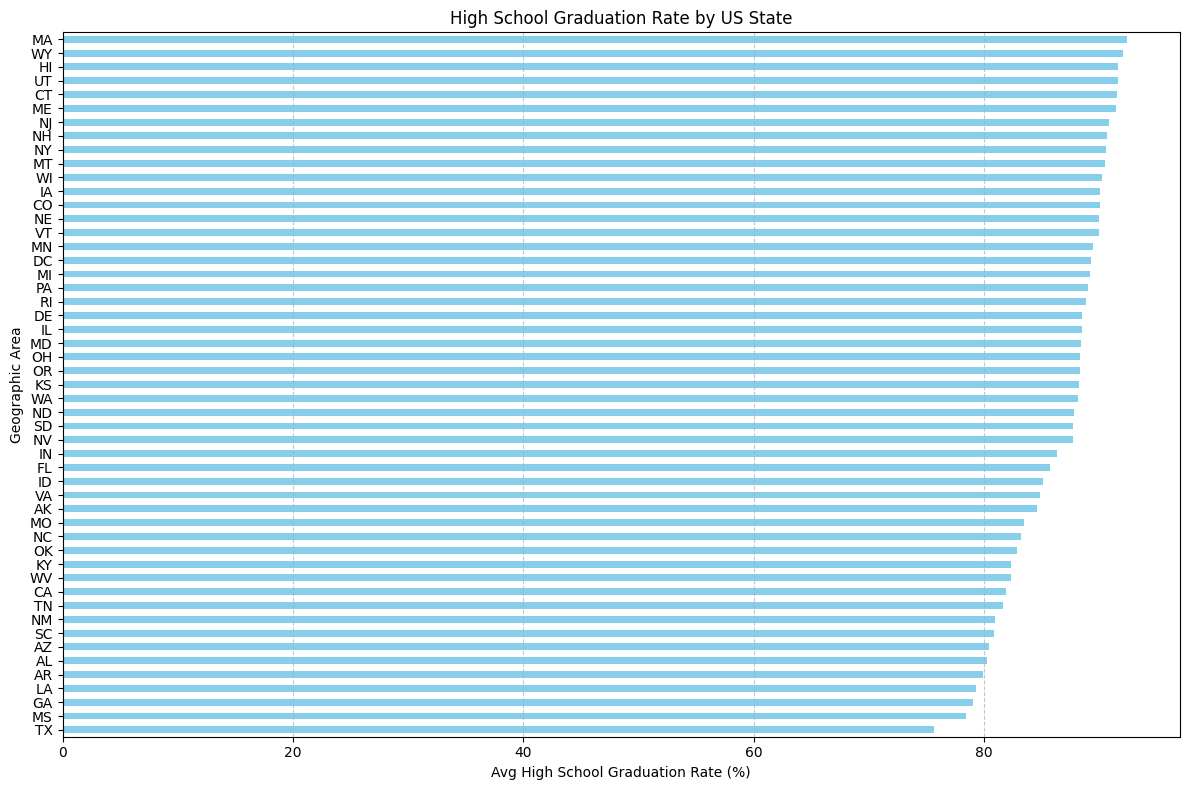

In [13]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")
grades_by_state = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
grades_by_state.plot(kind='barh', color='skyblue')
plt.xlabel("Avg High School Graduation Rate (%)")
plt.title("High School Graduation Rate by US State")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [14]:
merged_df = pd.merge(df_pct_completed_hs, df_pct_poverty, on='Geographic Area')

In [15]:
merged_df = merged_df.groupby('Geographic Area')[['percent_completed_hs', 'poverty_rate']].mean().reset_index()

In [16]:
merged_df = merged_df.sort_values(by='percent_completed_hs', ascending=False)

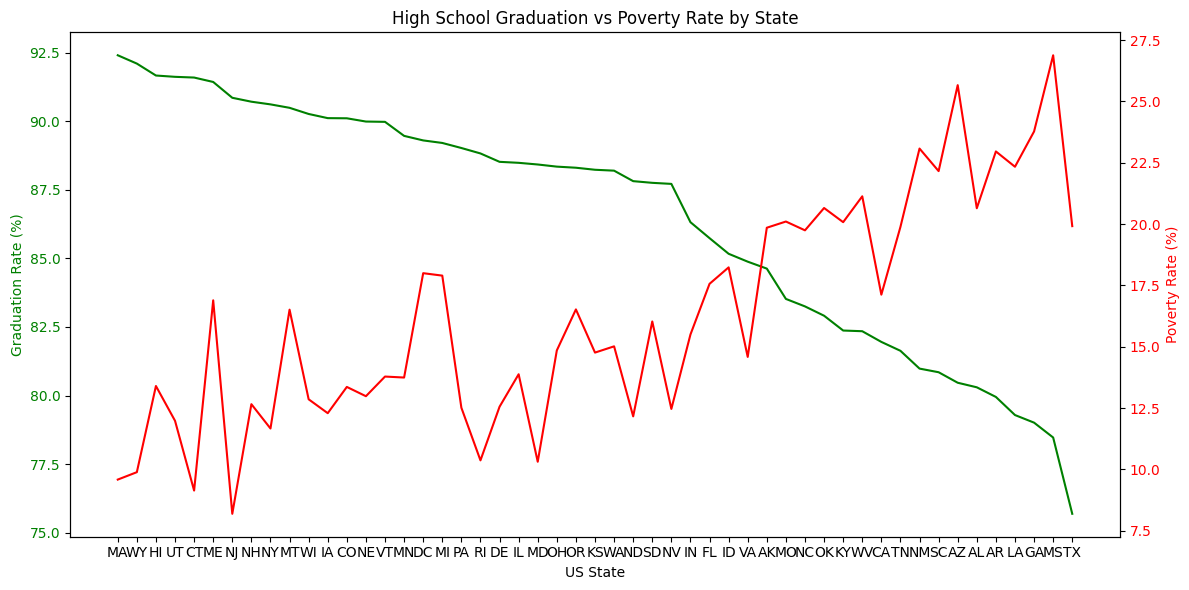

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First line: High School Graduation Rate
ax1.plot(merged_df['Geographic Area'], merged_df['percent_completed_hs'], color='green', label='Graduation Rate')
ax1.set_ylabel('Graduation Rate (%)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Second Y-Axis
ax2 = ax1.twinx()
ax2.plot(merged_df['Geographic Area'], merged_df['poverty_rate'], color='red', label='Poverty Rate')
ax2.set_ylabel('Poverty Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Common X-Axis Label and Title
ax1.set_xlabel('US State')
plt.title('High School Graduation vs Poverty Rate by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

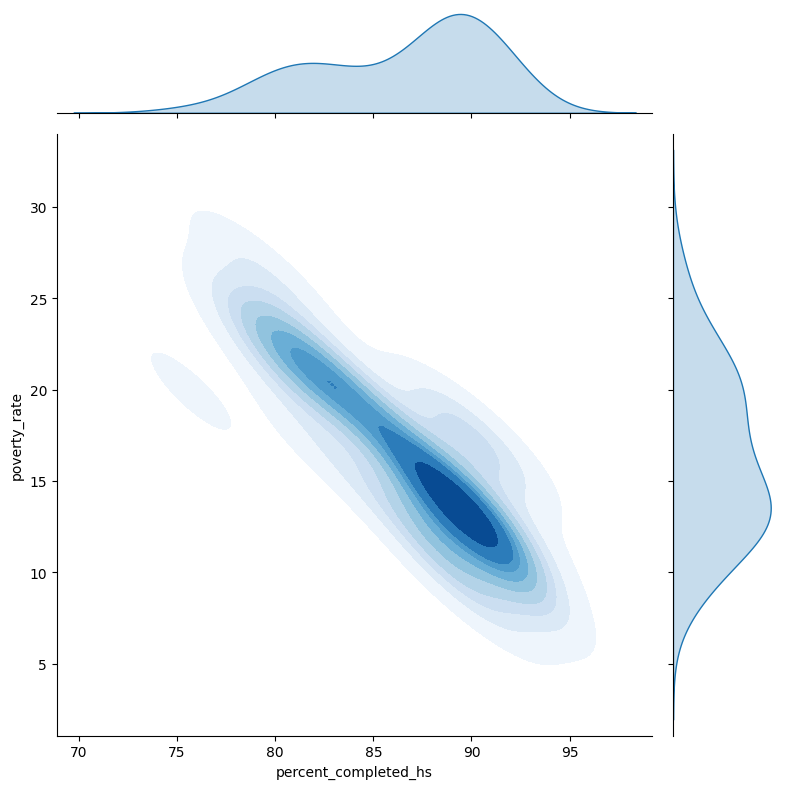

In [18]:
sns.jointplot(
    data=merged_df,
    x='percent_completed_hs',
    y='poverty_rate',
    kind='kde',
    fill=True,
    cmap='Blues',
    height=8
)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

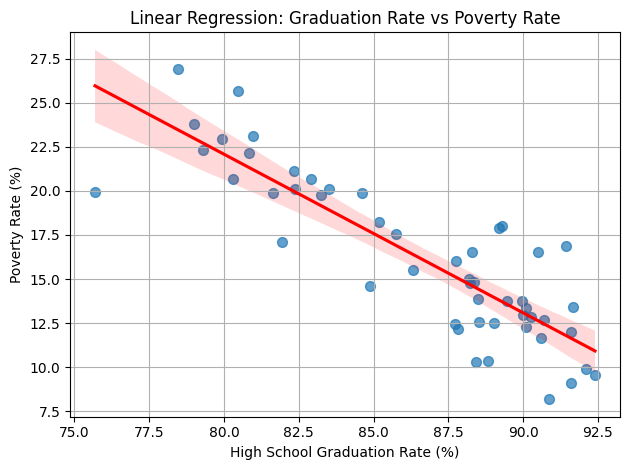

In [19]:
sns.regplot(
    data=merged_df,
    x='percent_completed_hs',
    y='poverty_rate',
    scatter_kws={'s': 50, 'alpha': 0.7},
    line_kws={'color': 'red'},
)
plt.title('Linear Regression: Graduation Rate vs Poverty Rate')
plt.xlabel('High School Graduation Rate (%)')
plt.ylabel('Poverty Rate (%)')
plt.grid(True)
plt.tight_layout()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [20]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [26]:
df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"], errors="coerce")
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"], errors="coerce")
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"], errors="coerce")
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"], errors="coerce")
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"], errors="coerce")

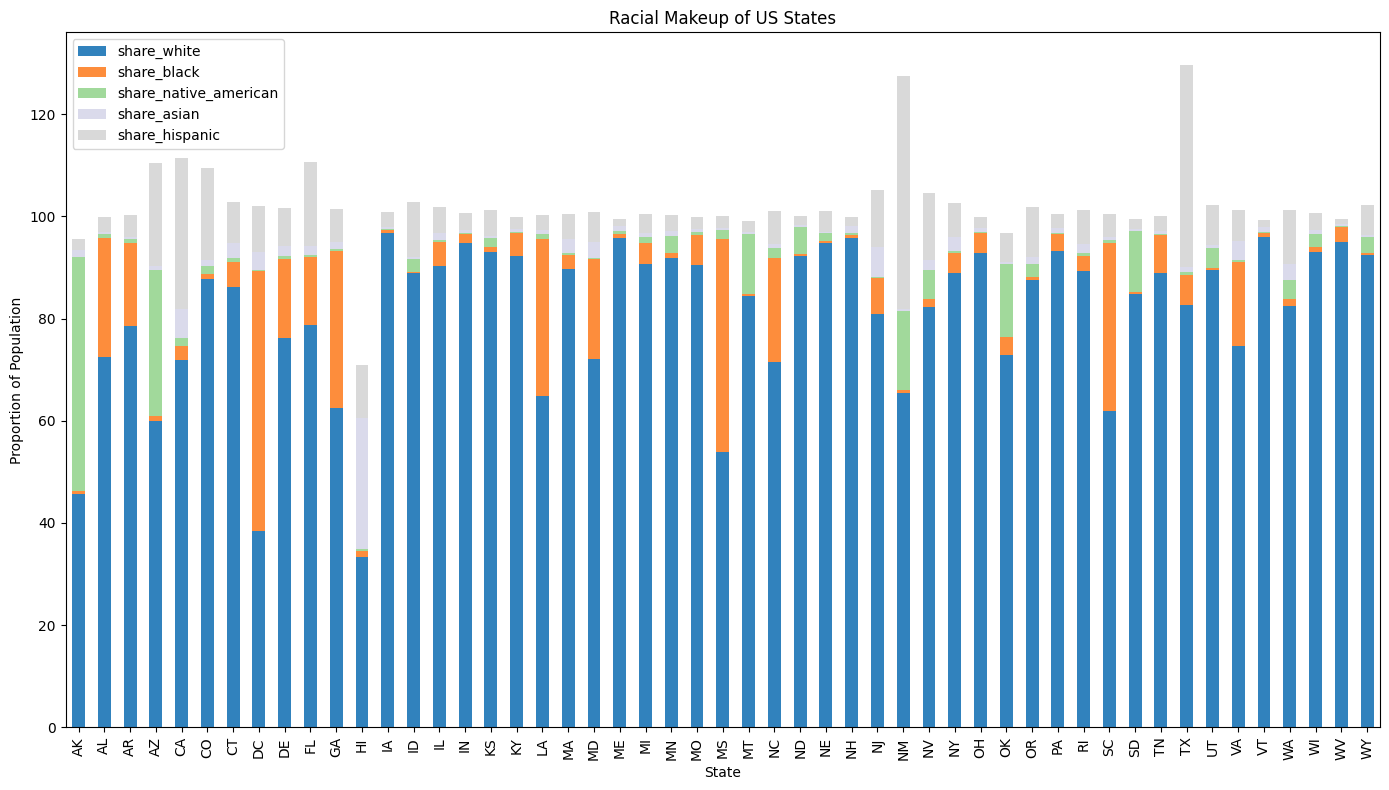

In [31]:
race_avg = df_share_race_city.groupby("Geographic area")[[
    "share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"
]].mean().reset_index()

race_avg = race_avg.set_index("Geographic area")

race_avg.sort_index().plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20c'
)

plt.title("Racial Makeup of US States")
plt.ylabel("Proportion of Population")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

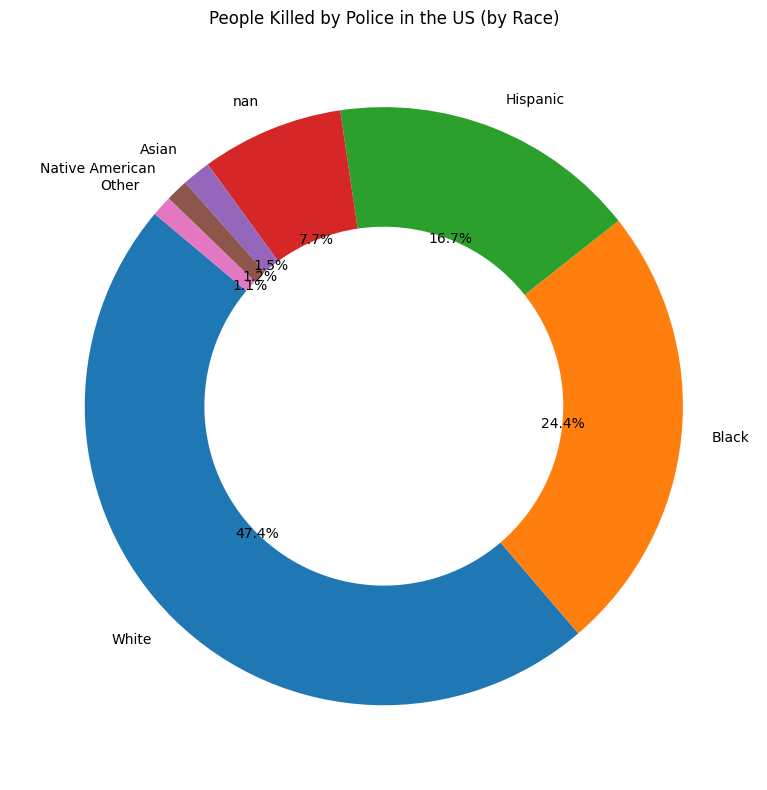

In [37]:
race_labels = {
    'W': 'White',
    'B': 'Black',
    'A': 'Asian',
    'N': 'Native American',
    'H': 'Hispanic',
    'O': 'Other'
}

race_counts = df_fatalities["race"].value_counts()
race_counts.index = race_counts.index.map(race_labels)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    race_counts,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)
)
plt.title("People Killed by Police in the US (by Race)")
plt.tight_layout()
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [41]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [42]:
df_fatalities["gender"].value_counts()

,count
gender,
M,2428
F,107


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [49]:
male_df = df_fatalities[df_fatalities['gender'] == 'M']
female_df = df_fatalities[df_fatalities['gender'] == 'F']

<ipython-input-50-a0f43b7d76a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


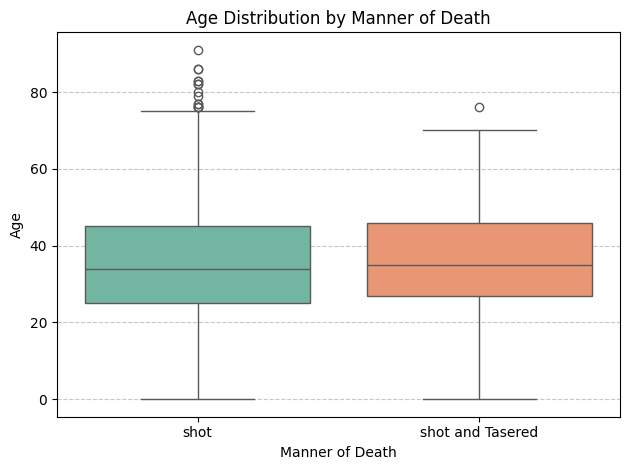

In [50]:
sns.boxplot(
    data=male_df,
    x='manner_of_death',
    y='age',
    palette='Set2'
)
plt.title("Age Distribution by Manner of Death")
plt.xlabel("Manner of Death")
plt.ylabel("Age")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-51-78120ef7c3f4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


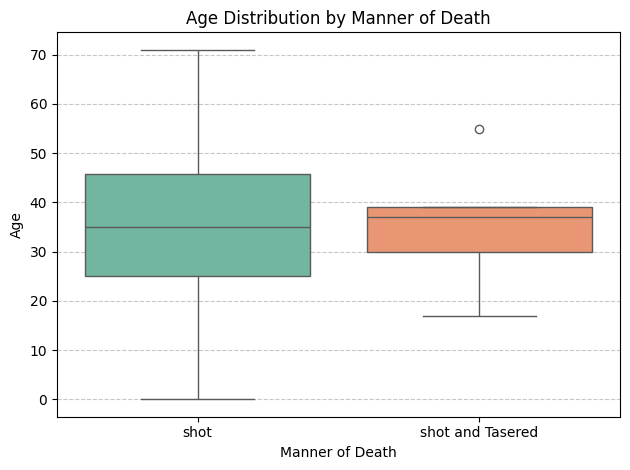

In [51]:
sns.boxplot(
    data=female_df,
    x='manner_of_death',
    y='age',
    palette='Set2'
)
plt.title("Age Distribution by Manner of Death")
plt.xlabel("Manner of Death")
plt.ylabel("Age")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [55]:
unarmed_count = df_fatalities['armed'].str.lower().str.contains('unarmed').sum()

In [61]:
df_fatalities.shape  #2535 is the total
armed_percent = 100 * (1 - unarmed_count / 2535)

<ipython-input-65-90ffefdef298>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=weapon_counts.index, x=weapon_counts.values, palette='mako')


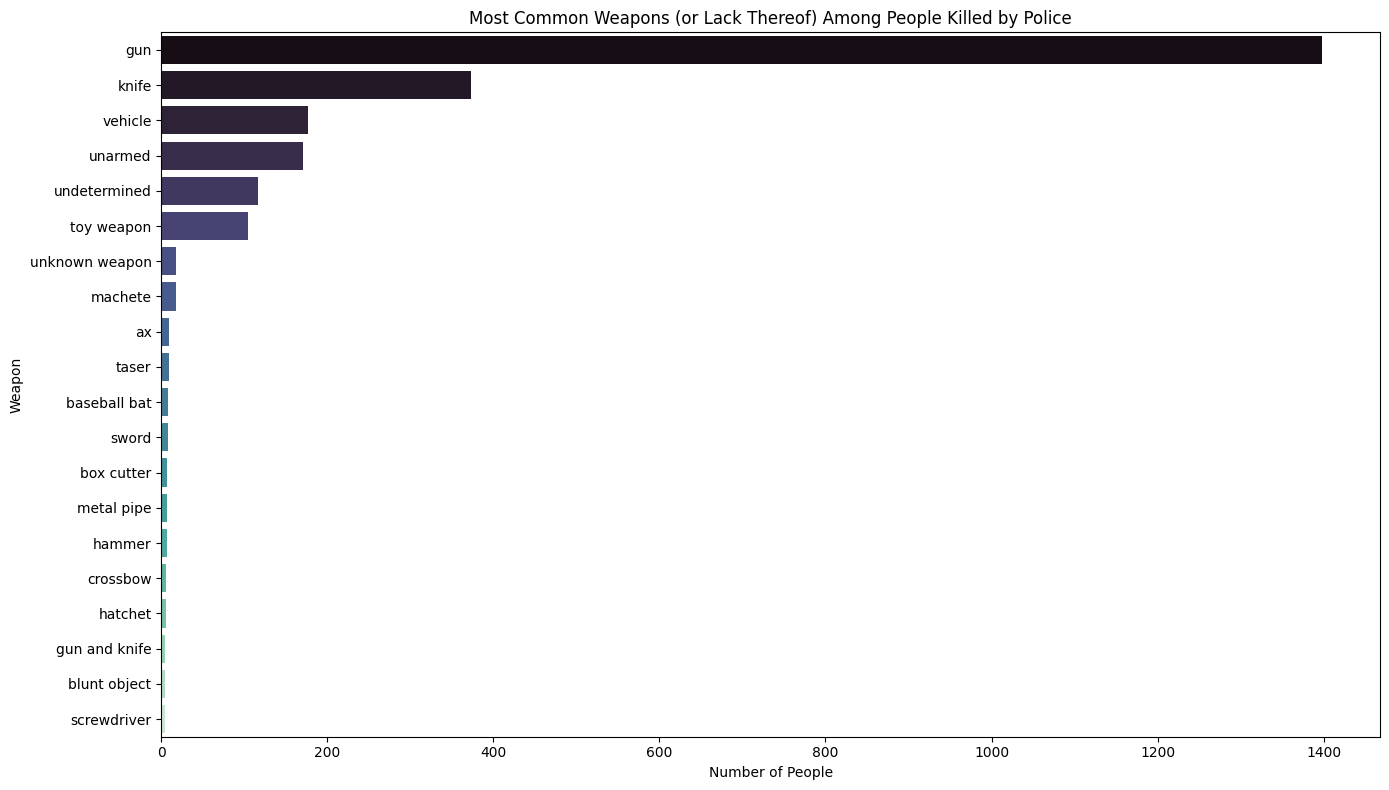

In [65]:
weapon_counts = df_fatalities['armed'].str.lower().value_counts().head(20)  #had to cap the weapon count as the graph was unreadable

plt.figure(figsize=(14, 8))
sns.barplot(y=weapon_counts.index, x=weapon_counts.values, palette='mako')
plt.title("Most Common Weapons (or Lack Thereof) Among People Killed by Police")
plt.xlabel("Number of People")
plt.ylabel("Weapon")
plt.tight_layout()
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [69]:
under_25 = df_fatalities[df_fatalities['age'] < 25].shape[0]
under_25_percent = (under_25 / 2535) * 100
under_25_percent #20.8%

20.78895463510848

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

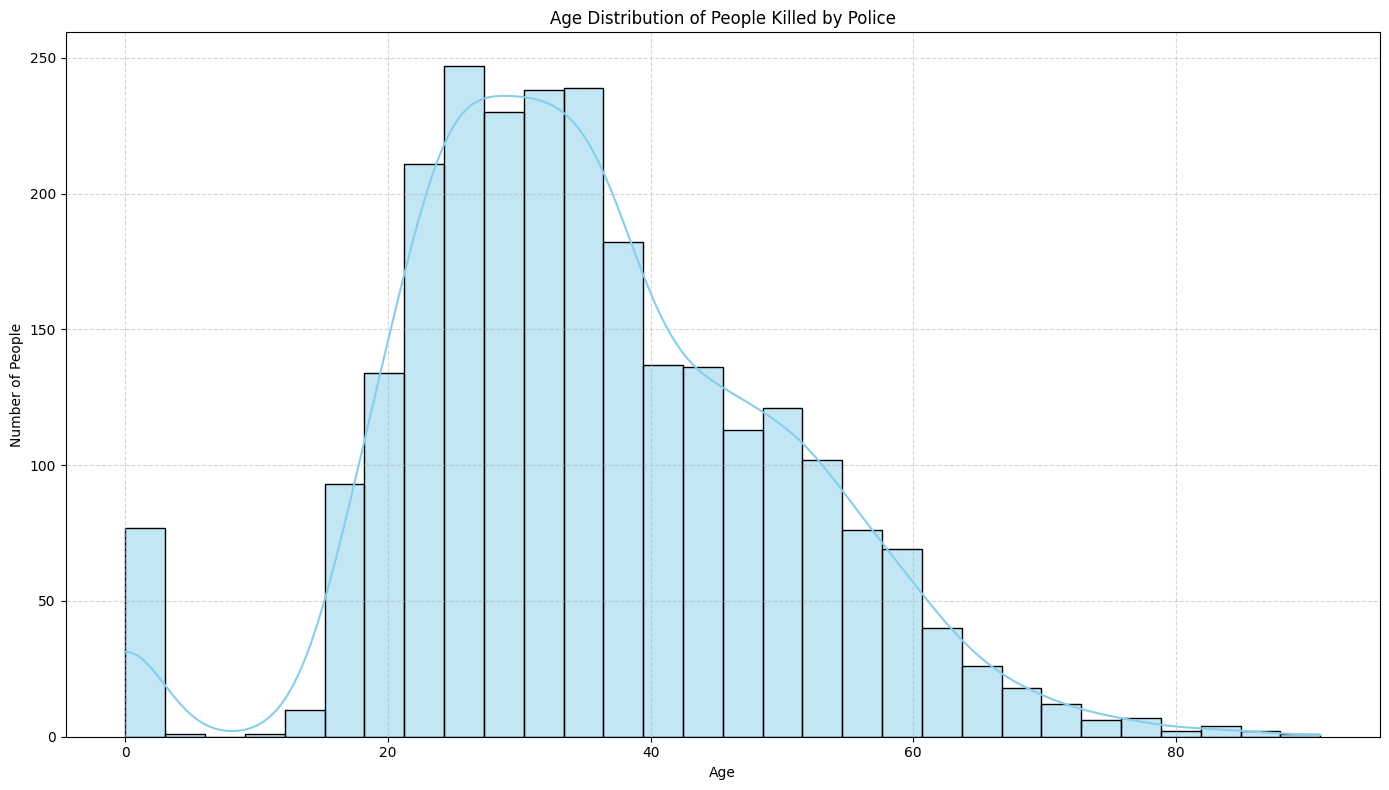

In [70]:
plt.figure(figsize=(14, 8))
sns.histplot(
    data=df_fatalities,
    x='age',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

plt.title('Age Distribution of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

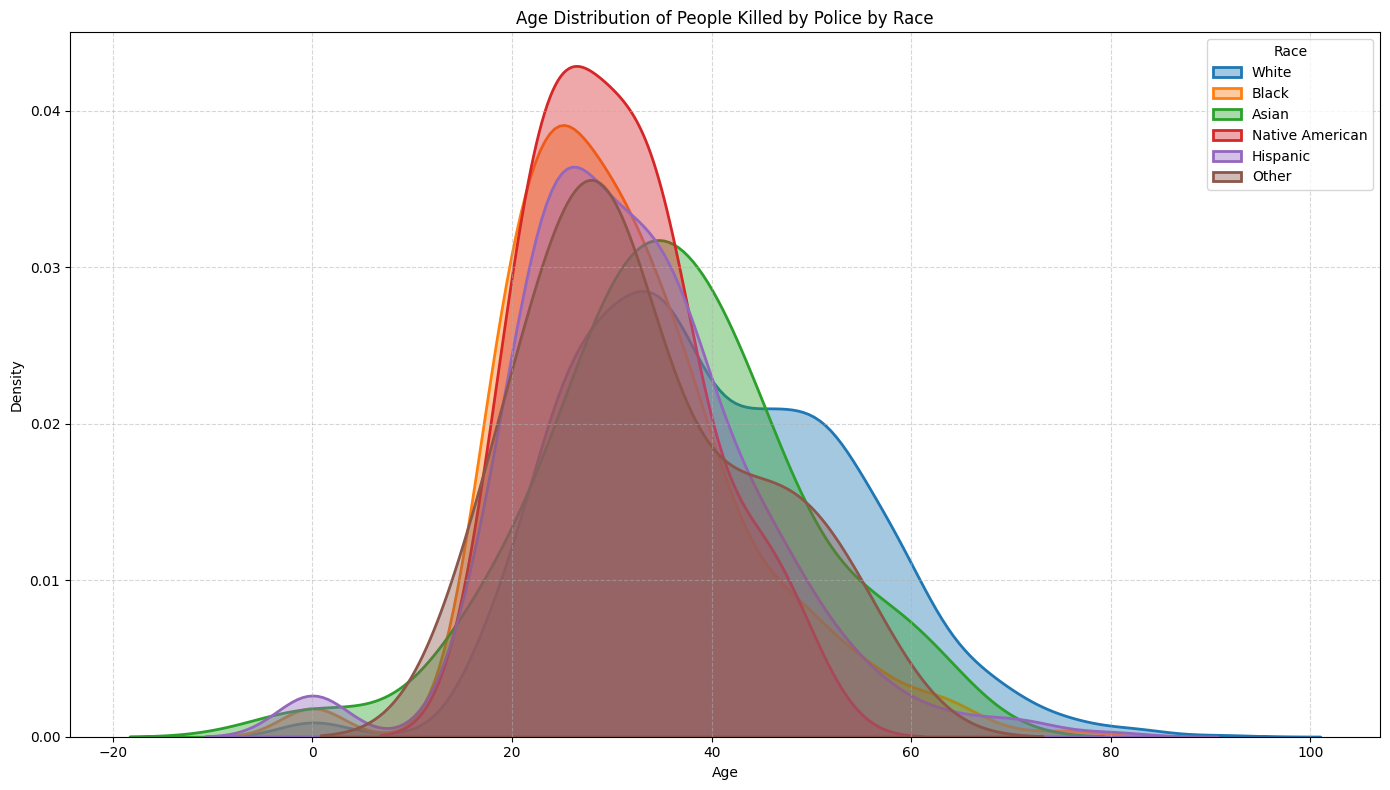

In [77]:
plt.figure(figsize=(14, 8))

for code, label in race_labels.items():
    subset = df_fatalities[df_fatalities['race'] == code]
    if not subset.empty:
        sns.kdeplot(
            data=subset,
            x='age',
            fill=True,
            alpha=0.4,
            linewidth=2,
            label=label
        )

plt.title('Age Distribution of People Killed by Police by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Race', loc='upper right')
plt.tight_layout()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

<ipython-input-78-56314b83c1f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


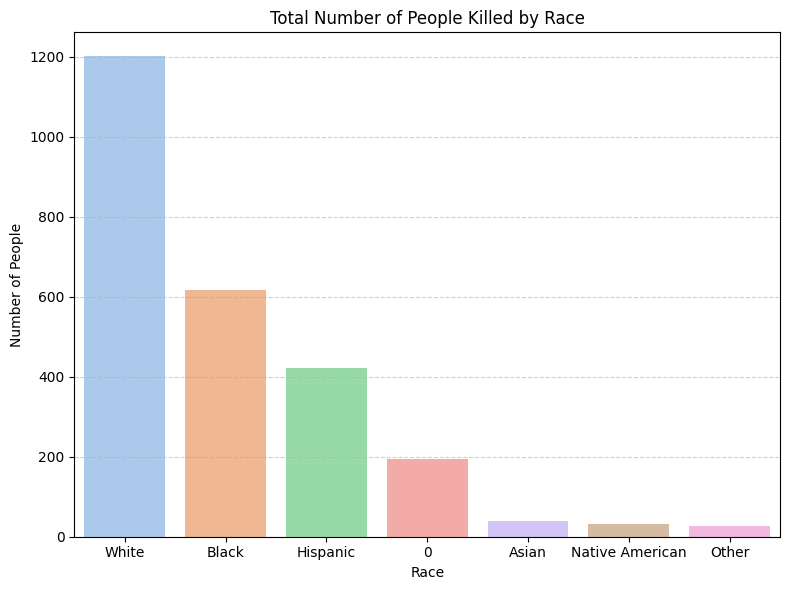

In [78]:
race_counts = df_fatalities['race'].replace(race_labels).value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=race_counts.index,
    y=race_counts.values,
    palette='pastel'
)
plt.title("Total Number of People Killed by Race")
plt.xlabel("Race")
plt.ylabel("Number of People")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [81]:
df_fatalities["signs_of_mental_illness"].value_counts()

,count
signs_of_mental_illness,
False,1902
True,633


In [87]:
mentally_ill_count = df_fatalities[df_fatalities['signs_of_mental_illness'] == True].shape[0]
mentally_ill_percent = (mentally_ill_count / 2535) * 100
mentally_ill_percent  #25%

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [88]:
top_cities = df_fatalities['city'].value_counts().nlargest(10)

<ipython-input-89-9840322865c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


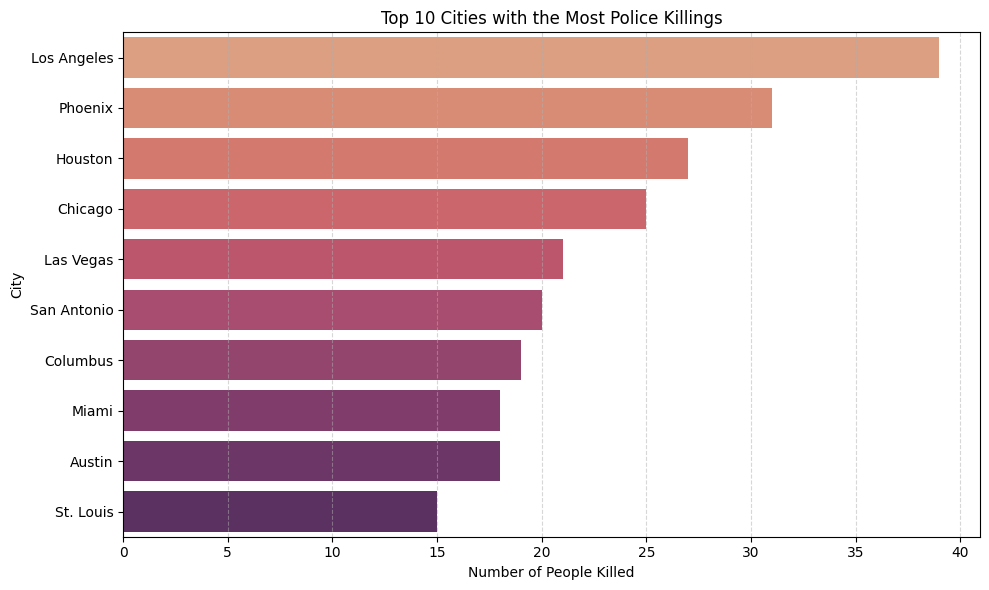

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    palette='flare'
)

plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('Number of People Killed')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [113]:
killings_by_state = df_fatalities.groupby('state').size().reset_index(name='killings')
killings_by_state.head()

,state,killings
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424


In [115]:
fig = px.choropleth(killings_by_state,
                    locations='state',
                    locationmode='USA-states',
                    color='killings',
                    hover_name='state',
                    color_continuous_scale='Viridis',
                    labels={'killings': 'Number of Police Killings'},
                    title='Police Killings by US State')

fig.update_layout(geo=dict(scope='usa'))
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [116]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

<ipython-input-116-ea1695318982>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [118]:
df_fatalities['year'] = df_fatalities['date'].dt.year
killings_by_year = df_fatalities.groupby('year').size().reset_index(name='killings')

killings_by_year.head()

,year,killings
0,2015,991
1,2016,963
2,2017,581


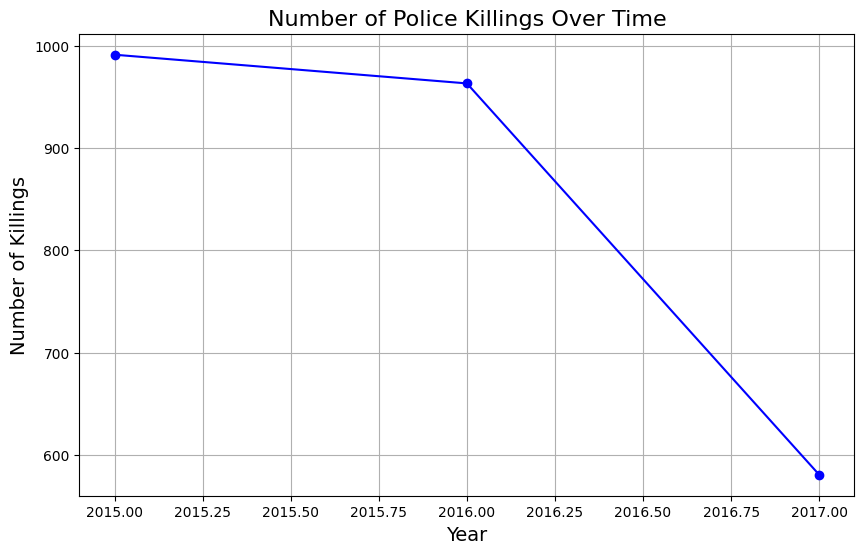

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(killings_by_year['year'], killings_by_year['killings'], marker='o', color='b')
plt.title('Number of Police Killings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Killings', fontsize=14)
plt.grid(True)
plt.show()